Turnovers have long been recognized as a defining variable in the outcome of NFL games. However, the context of those turnovers matters. A game between two evenly matched teams might swing wildly on a single interception, while a blowout matchup may be less sensitive to turnover swings. To more precisely model how win probability changes based on game dynamics, we evaluated the interaction between turnover differential and team quality, as measured by the Simple Rating System (SRS).

The objective of this research was to explore two complementary approaches:

An empirical bucketed win rate analysis based on actual outcomes from 10 years of NFL games.

A logistic regression model that incorporates turnover differential, binned SRS differential, and their interaction.

Empirical Bucketed Win Rate Analysis by TO Differential and Exploration of Turnover Differential Exploration by Team Quality 


=== Turnover Differential Summary ===
    Turnover Differential  Games Won  Games Lost  Win Rate  Δ Win Rate vs. 0
0                      -7          0           1     0.000            -0.500
1                      -6          0           7     0.000            -0.500
2                      -5          3          22     0.120            -0.380
3                      -4          4         103     0.037            -0.463
4                      -3         27         285     0.087            -0.413
5                      -2        114         517     0.181            -0.319
6                      -1        351         671     0.343            -0.157
7                       0        620         620     0.500             0.000
8                       1        671         351     0.657             0.157
9                       2        517         114     0.819             0.319
10                      3        285          27     0.913             0.413
11                      4        103 

C:\Users\250331\AppData\Local\Temp\ipykernel_29208\1841523440.py:46: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('team_srs_bin')['turnover_differential']


Team SRS Bin (with Range),Avg Turnover Differential per Game
"Low SRS [-100, -7.5]",-0.53
"Below Avg [-7.5, -2.5]",-0.31
"Average [-2.5, 2.5]",0.01
"Above Avg [2.5, 7.5]",0.28
"High SRS [7.5, 100]",0.48



=== Turnover Differential Distribution by Team SRS Bin (% of Games) ===


C:\Users\250331\AppData\Local\Temp\ipykernel_29208\1841523440.py:59: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(['team_srs_bin', 'turnover_differential'])


team_srs_bin,-7,-6,-5,-4,-3,-2,-1,0,1,2,3,4,5,6,7
"Low SRS [-100, -7.5]",0.2,0.2,0.6,3.3,9.7,15.4,20.3,23.3,14.3,8.5,2.7,1.1,0.3,0.2,0.0
"Below Avg [-7.5, -2.5]",0.0,0.2,0.7,3.2,7.0,13.1,20.7,23.3,17.4,8.8,4.1,1.2,0.3,0.1,0.0
"Average [-2.5, 2.5]",0.0,0.2,0.4,1.9,5.4,11.3,19.9,22.3,18.6,11.3,6.1,2.0,0.6,0.0,0.0
"Above Avg [2.5, 7.5]",0.0,0.0,0.3,0.9,4.0,10.9,16.4,22.0,21.8,13.6,7.3,2.0,0.3,0.3,0.1
"High SRS [7.5, 100]",0.0,0.0,0.1,0.7,3.9,7.6,15.5,24.0,20.2,16.0,7.3,3.9,0.7,0.1,0.0


✅ Outputs saved to 'srs_bin_turnover_summary.csv' and 'srs_bin_turnover_distribution.csv'

=== Turnover Category Summary by SRS Tier ===
                 SRS Tier  % Negative TO Ratio  % Even/Positive TO Ratio
0    Low SRS [-100, -7.5]                 49.7                      50.3
1  Below Avg [-7.5, -2.5]                 44.9                      55.1
2     Average [-2.5, 2.5]                 39.1                      60.9
3    Above Avg [2.5, 7.5]                 32.6                      67.4
4     High SRS [7.5, 100]                 27.8                      72.2


C:\Users\250331\AppData\Local\Temp\ipykernel_29208\1841523440.py:89: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(['team_srs_bin', 'to_category'])


SRS Tier,% Negative TO Ratio,% Even/Positive TO Ratio
"Low SRS [-100, -7.5]",49.7,50.3
"Below Avg [-7.5, -2.5]",44.9,55.1
"Average [-2.5, 2.5]",39.1,60.9
"Above Avg [2.5, 7.5]",32.6,67.4
"High SRS [7.5, 100]",27.8,72.2


✅ TO category summary saved to 'srs_bin_to_category_summary.csv'


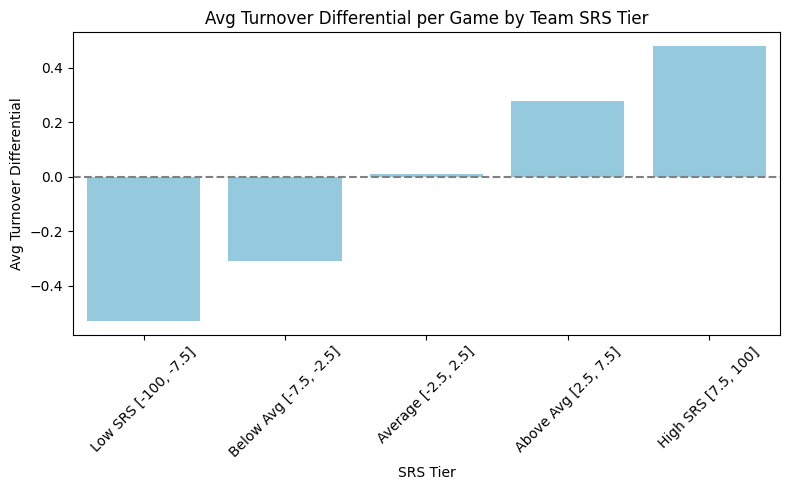

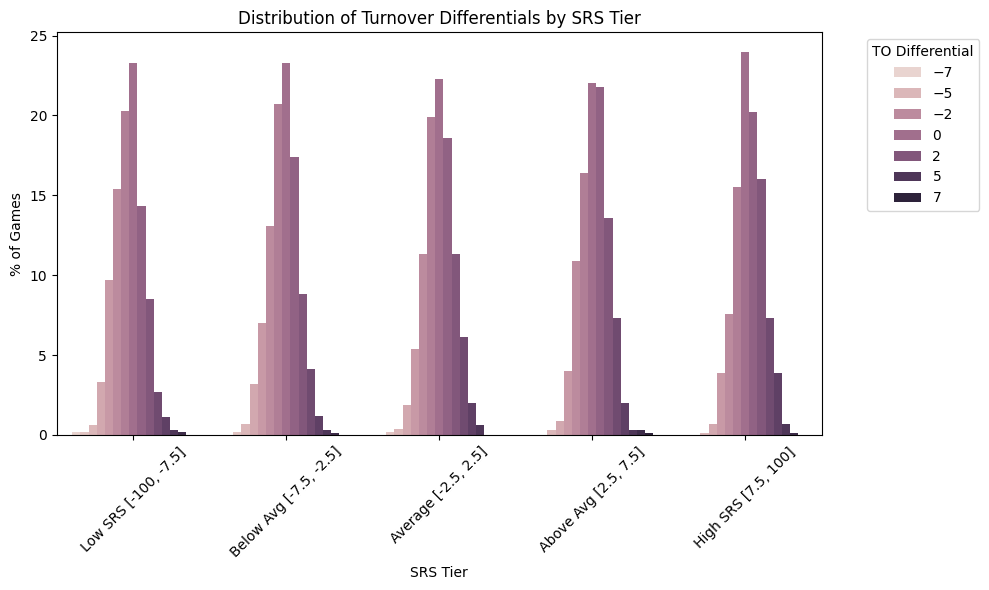

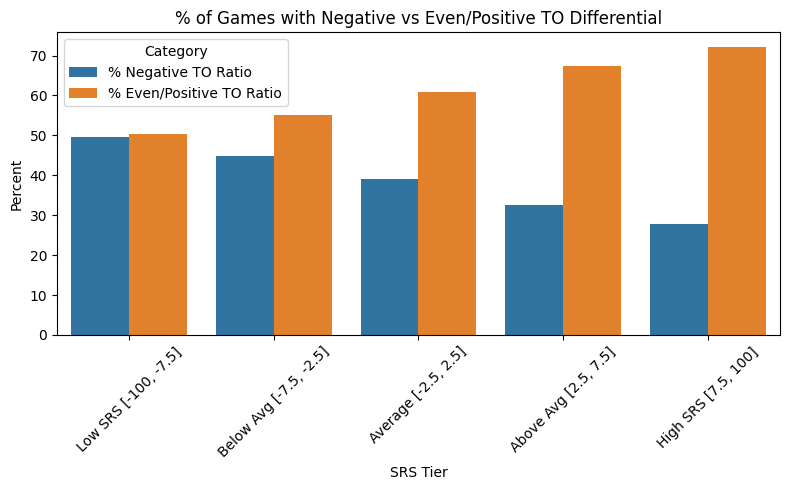

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from IPython.display import display, HTML

def display_scrollable_table(df, max_height='300px', max_width='1000px'):
    styles = f"""
        <div style="overflow:auto; max-height:{max_height}; max-width:{max_width}; border:1px solid lightgray; padding:5px;">
            {df.to_html(index=False)}
        </div>
    """
    display(HTML(styles))

# === Step 1: Load the Data ===
file_path = "C:\\Users\\250331\\OneDrive - MyFedEx\\Documents\\NFL Data\\Analysis\\turnover_analysis_2014_2023.xlsx"
df = pd.read_excel(file_path)

# === Step 2: Create Turnover Summary Table ===
summary = df.groupby('turnover_differential')['won_game'].agg(['sum', 'count']).reset_index()
summary.columns = ['Turnover Differential', 'Games Won', 'Total Games']
summary['Games Lost'] = summary['Total Games'] - summary['Games Won']
summary['Win Rate'] = (summary['Games Won'] / summary['Total Games']).round(3)

# Compute delta from 0 turnover differential
zero_win_rate = summary.loc[summary['Turnover Differential'] == 0, 'Win Rate'].values[0]
summary['Δ Win Rate vs. 0'] = (summary['Win Rate'] - zero_win_rate).round(3)

# Print summary
print("\n=== Turnover Differential Summary ===")
print(summary[['Turnover Differential', 'Games Won', 'Games Lost', 'Win Rate', 'Δ Win Rate vs. 0']].sort_values('Turnover Differential'))

# === Step 3: Create Team SRS Bins ===
srs_bins = [-100, -7.5, -2.5, 2.5, 7.5, 100]
srs_labels = [
    'Low SRS [-100, -7.5]',
    'Below Avg [-7.5, -2.5]',
    'Average [-2.5, 2.5]',
    'Above Avg [2.5, 7.5]',
    'High SRS [7.5, 100]'
]
df['team_srs_bin'] = pd.cut(df['team_srs'], bins=srs_bins, labels=srs_labels)

# === Step 4: Average Turnover Differential per SRS Bin ===
to_summary_by_team_srs = (
    df.groupby('team_srs_bin')['turnover_differential']
    .mean()
    .round(2)
    .reset_index()
)
to_summary_by_team_srs.columns = ['Team SRS Bin (with Range)', 'Avg Turnover Differential per Game']

print("\n=== Average Turnover Differential per Game by Team SRS Bin ===")
#print(to_summary_by_team_srs)
display_scrollable_table(to_summary_by_team_srs)

# === Step 5: Distribution of Turnover Differentials Within Each SRS Bin ===
pivot = (
    df.groupby(['team_srs_bin', 'turnover_differential'])
    .size()
    .unstack(fill_value=0)
)

# Convert counts to percentages within each SRS bin
pivot_percent = (pivot.T / pivot.sum(axis=1)).T.round(3) * 100  # percent format
pivot_percent = pivot_percent.reset_index()
pivot_percent.columns.name = None  # remove column index name

print("\n=== Turnover Differential Distribution by Team SRS Bin (% of Games) ===")
#print(pivot_percent)
display_scrollable_table(pivot_percent)

# === Step 6: Save Output to CSV ===
to_summary_by_team_srs.to_csv("srs_bin_turnover_summary.csv", index=False)
pivot_percent.to_csv("srs_bin_turnover_distribution.csv", index=False)

print("✅ Outputs saved to 'srs_bin_turnover_summary.csv' and 'srs_bin_turnover_distribution.csv'")

# === Step 7: Summary of Negative vs. Even/Positive Turnover Differential by SRS Bin ===
def get_to_category(td):
    if td < 0:
        return 'Negative'
    else:
        return 'Even/Positive'

df['to_category'] = df['turnover_differential'].apply(get_to_category)

to_cat_summary = (
    df.groupby(['team_srs_bin', 'to_category'])
    .size()
    .unstack(fill_value=0)
)

# Calculate % within each SRS bin
to_cat_summary_percent = (to_cat_summary.T / to_cat_summary.sum(axis=1)).T * 100
to_cat_summary_percent = to_cat_summary_percent[['Negative', 'Even/Positive']].round(1).reset_index()
to_cat_summary_percent.columns = ['SRS Tier', '% Negative TO Ratio', '% Even/Positive TO Ratio']

print("\n=== Turnover Category Summary by SRS Tier ===")
print(to_cat_summary_percent)
display_scrollable_table(to_cat_summary_percent)
to_cat_summary_percent.to_csv("srs_bin_to_category_summary.csv", index=False)
print("✅ TO category summary saved to 'srs_bin_to_category_summary.csv'")

plt.figure(figsize=(8, 5))
sns.barplot(
    data=to_summary_by_team_srs,
    x='Team SRS Bin (with Range)',
    y='Avg Turnover Differential per Game',
    color='skyblue'
)
plt.axhline(0, color='gray', linestyle='--')
plt.title('Avg Turnover Differential per Game by Team SRS Tier')
plt.ylabel('Avg Turnover Differential')
plt.xlabel('SRS Tier')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

pivot_melted = pivot_percent.melt(id_vars='team_srs_bin', var_name='Turnover Differential', value_name='Percent')

plt.figure(figsize=(10, 6))
sns.barplot(
    data=pivot_melted,
    x='team_srs_bin',
    y='Percent',
    hue='Turnover Differential'
)
plt.title('Distribution of Turnover Differentials by SRS Tier')
plt.ylabel('% of Games')
plt.xlabel('SRS Tier')
plt.xticks(rotation=45)
plt.legend(title='TO Differential', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

melted_cat = to_cat_summary_percent.melt(id_vars='SRS Tier', var_name='Category', value_name='Percent')

plt.figure(figsize=(8, 5))
sns.barplot(data=melted_cat, x='SRS Tier', y='Percent', hue='Category')
plt.title('% of Games with Negative vs Even/Positive TO Differential')
plt.ylabel('Percent')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Discussion
- Bucket Analysis: The pattern is strikingly linear: each additional turnover in your favor increases win rate by roughly 15-17%, up to a point. But this does not take into account team quality or SRS

- TO Differential / Team Quality Exploration
    -High SRS teams are more likely to win the turnover battle and less likely to suffer high-negative turnover games.
    -Low SRS teams are more frequently on the losing side of the turnover margin.

    These patterns align with the regression model results and help explain why turnover differential effects are asymmetric:

    Good teams often amplify their advantage with better turnover performance.

    Bad teams, even with a positive turnover swing, may only reach a coin-flip win probability.

    The progression in the Turnover Balance by SRS Tier Table highlights a structural edge: as team quality increases, so does the likelihood of producing a positive turnover outcome. This supports our earlier conclusion that strong teams not only win more — they create favorable turnover margins that compound their advantage.




Logistic Regression Analysis

In [1]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

# === Step 1: Load Data ===
file_path = r"C:\Users\250331\OneDrive - MyFedEx\Documents\NFL Data\Analysis\turnover_analysis_for_log_regression_new.csv"
df = pd.read_csv(file_path)
print(df.columns.tolist())

# Clean column names
df.columns = [col.strip().lower().replace(" ", "_") for col in df.columns]

# === Step 2: Bin SRS Differential ===
df['srs_bin'] = pd.cut(
    df['team_srs_differential'],
    bins = [-100, -7.5, -2.5, 2.5, 7.5, 100],
    labels = ['Much_Weaker', 'Weaker', 'Even', 'Stronger', 'Much_Stronger']
)

# Convert to dummy variables (excluding first to avoid dummy trap)
srs_dummies = pd.get_dummies(df['srs_bin'], prefix='srs', drop_first=True)
df = pd.concat([df, srs_dummies], axis=1)

# === Step 3: Create Interaction Terms ===
for col in srs_dummies.columns:
    df[f'interact_{col}'] = df['turnover_differential'] * df[col]

# === Step 4: Prepare Features and Target ===
feature_cols = ['turnover_differential'] + list(srs_dummies.columns) + [f'interact_{col}' for col in srs_dummies.columns]
X = df[feature_cols]
y = df['won_game']

# === Step 5: Train-Test Split ===
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# === Step 6: Train Logistic Regression Model ===
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# === Step 7: Evaluate Model ===
y_pred = model.predict(X_test)

print("=== Confusion Matrix ===")
print(confusion_matrix(y_test, y_pred))

print("\n=== Classification Report ===")
print(classification_report(y_test, y_pred))

# === Step 8: View Coefficients ===
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_[0]
})
print("\n=== Model Coefficients ===")
print(coefficients)

# === Step 9: Predict Probabilities ===
probs = model.predict_proba(X_test)[:, 1]

prob_df = pd.DataFrame({
    'predicted_win_probability': probs,
    'actual_outcome': y_test.reset_index(drop=True)
})

print("\n=== Sample Win Probabilities ===")
print(prob_df.head(10))

['game_id', 'season', 'week', 'team', 'team SRS', 'team srs differential', 'opponent', 'opponent SRS', 'won_game', 'turnovers_committed', 'turnovers_forced', 'turnover_differential', 'turnover differential srs interaction']
=== Confusion Matrix ===
[[400 135]
 [137 418]]

=== Classification Report ===
              precision    recall  f1-score   support

           0       0.74      0.75      0.75       535
           1       0.76      0.75      0.75       555

    accuracy                           0.75      1090
   macro avg       0.75      0.75      0.75      1090
weighted avg       0.75      0.75      0.75      1090


=== Model Coefficients ===
                      Feature  Coefficient
0       turnover_differential     0.762377
1                  srs_Weaker     0.643975
2                    srs_Even     1.407528
3                srs_Stronger     2.234595
4           srs_Much_Stronger     3.049532
5         interact_srs_Weaker    -0.085754
6           interact_srs_Even     0.01419

Key Observations:
✅ Turnover Differential: Positive coefficient (+0.76): Each additional turnover in your favor (forcing one or avoiding one) significantly increases the odds of winning. This confirms the intuitive understanding that turnovers swing outcomes.

Interpretation Note: Logistic regression operates on log-odds. Around the 50% win probability baseline, each +1 in turnover differential increases win probability by ~15–16 percentage points (e.g., from 50% to ~66%).

✅ SRS Bins:

Being in the srs_Much_Stronger_than_Opponent bin (+3.05) has a larger effect than even a +3 turnover swing.

Surprisingly, being in the srs_Weaker_than_Opponent bin (+0.64) offers nearly the same odds boost as a +1 turnover swing.

All SRS bins stronger than "Weaker" have coefficients greater than +0.76, confirming SRS differential is a more powerful base predictor than turnovers alone.

✅ Interaction Terms: Mostly negative and small. This suggests the effect of turnovers is diminished slightly when the team is already expected to dominate or be outmatched.

